In [3]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
# loading the dataset and using head() 

df= pd.read_csv("C:\\Users\\LENOVO\\Desktop\\MeritMap\\Data\\student_dataset.csv")
df.head(5)

,student_id,age,gender,cgpa,branch,college_tier,internships_count,projects_count,certifications_count,coding_skill_score,...,mock_interview_score,attendance_percentage,backlogs,extracurricular_score,leadership_score,volunteer_experience,sleep_hours,study_hours_per_day,placement_status,salary_package_lpa
0,1,24,Male,7.53,IT,Tier 2,4,6,1,99.238568,...,72.647009,77.463863,2,63.382726,52.938240,Yes,6.7,3.6,Not Placed,0.00
1,2,21,Male,7.92,CSE,Tier 2,1,3,6,80.966123,...,61.699110,88.887600,1,73.694605,60.198856,No,4.4,2.3,Not Placed,0.00
2,3,22,Female,8.60,EEE,Tier 1,0,1,1,49.177184,...,87.396911,74.153265,0,63.329294,43.708803,No,8.8,5.9,Placed,11.99
3,4,24,Male,6.68,CSE,Tier 1,0,2,2,79.359084,...,58.401069,87.635955,1,47.636099,56.549154,Yes,8.1,4.4,Not Placed,0.00
4,5,20,Female,8.43,IT,Tier 3,1,4,3,65.018573,...,74.489201,79.120749,1,0.000000,67.268893,No,8.7,3.4,Placed,12.16


In [5]:
# dataset info 

df.info()

# null value check
print("null ones:")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   student_id                 100000 non-null  int64  
 1   age                        100000 non-null  int64  
 2   gender                     100000 non-null  object 
 3   cgpa                       100000 non-null  float64
 4   branch                     100000 non-null  object 
 5   college_tier               100000 non-null  object 
 6   internships_count          100000 non-null  int64  
 7   projects_count             100000 non-null  int64  
 8   certifications_count       100000 non-null  int64  
 9   coding_skill_score         100000 non-null  float64
 10  aptitude_score             100000 non-null  float64
 11  communication_skill_score  100000 non-null  float64
 12  logical_reasoning_score    100000 non-null  float64
 13  hackathons_participated    100

student_id                   0
age                          0
gender                       0
cgpa                         0
branch                       0
college_tier                 0
internships_count            0
projects_count               0
certifications_count         0
coding_skill_score           0
aptitude_score               0
communication_skill_score    0
logical_reasoning_score      0
hackathons_participated      0
github_repos                 0
linkedin_connections         0
mock_interview_score         0
attendance_percentage        0
backlogs                     0
extracurricular_score        0
leadership_score             0
volunteer_experience         0
sleep_hours                  0
study_hours_per_day          0
placement_status             0
salary_package_lpa           0
dtype: int64

In [6]:
# check duplicates 

df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
# dropping columns of less importance

df.drop(columns=['salary_package_lpa', 'student_id', 'gender', 'age'], inplace=True)

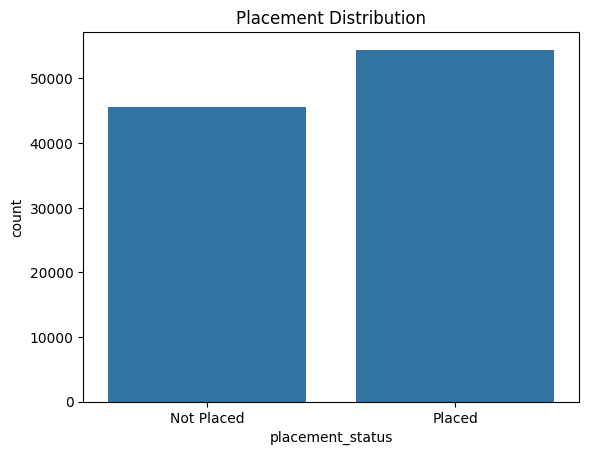

In [8]:
# checking for balance

df['placement_status'].value_counts()
sns.countplot(x='placement_status', data=df)
plt.title("Placement Distribution")
plt.show()

In [9]:
# checking for catagorical columns

df.select_dtypes(include=['object']).columns

Index(['branch', 'college_tier', 'volunteer_experience', 'placement_status'], dtype='object')

In [10]:
# encoding 

df['placement_status'] = df['placement_status'].map({
    'Not Placed': 0,
    'Placed': 1
})


df['volunteer_experience'] = df['volunteer_experience'].map({
    'Yes': 1,
    'No': 0
})

df['college_tier'] = df['college_tier'].map({
    'Tier 1': 3,
    'Tier 2': 2,
    'Tier 3': 1
})


df = pd.get_dummies(df, columns=['branch'], drop_first=True) #one-hot

In [11]:
df.head(5)

,cgpa,college_tier,internships_count,projects_count,certifications_count,coding_skill_score,aptitude_score,communication_skill_score,logical_reasoning_score,hackathons_participated,...,leadership_score,volunteer_experience,sleep_hours,study_hours_per_day,placement_status,branch_Civil,branch_ECE,branch_EEE,branch_IT,branch_Mechanical
0,7.53,2,4,6,1,99.238568,81.707722,57.707166,59.070073,4,...,52.938240,1,6.7,3.6,0,False,False,False,True,False
1,7.92,2,1,3,6,80.966123,63.116715,59.197085,78.976419,0,...,60.198856,0,4.4,2.3,0,False,False,False,False,False
2,8.60,3,0,1,1,49.177184,48.658753,92.104885,80.603331,0,...,43.708803,0,8.8,5.9,1,False,False,True,False,False
3,6.68,3,0,2,2,79.359084,66.376653,83.411798,64.187246,1,...,56.549154,1,8.1,4.4,0,False,False,False,False,False
4,8.43,1,1,4,3,65.018573,61.274985,88.956331,56.163678,1,...,67.268893,0,8.7,3.4,1,False,False,False,True,False


In [12]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [13]:
df.columns

Index(['cgpa', 'college_tier', 'internships_count', 'projects_count',
       'certifications_count', 'coding_skill_score', 'aptitude_score',
       'communication_skill_score', 'logical_reasoning_score',
       'hackathons_participated', 'github_repos', 'linkedin_connections',
       'mock_interview_score', 'attendance_percentage', 'backlogs',
       'extracurricular_score', 'leadership_score', 'volunteer_experience',
       'sleep_hours', 'study_hours_per_day', 'placement_status',
       'branch_Civil', 'branch_ECE', 'branch_EEE', 'branch_IT',
       'branch_Mechanical'],
      dtype='object')

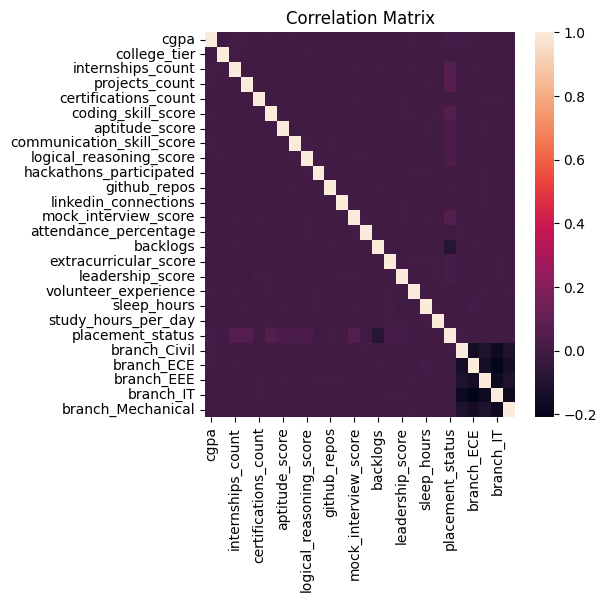

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=False )
plt.title("Correlation Matrix")
plt.show()

In [15]:
# min and max values 

for col in df.columns:
    if df[col].dtype != 'object':
        print(col, "→ Min:", df[col].min(), "Max:", df[col].max())

cgpa → Min: 4.5 Max: 10.0
college_tier → Min: 1 Max: 3
internships_count → Min: 0 Max: 8
projects_count → Min: 0 Max: 13
certifications_count → Min: 0 Max: 11
coding_skill_score → Min: 20.0 Max: 100.0
aptitude_score → Min: 20.0 Max: 100.0
communication_skill_score → Min: 20.0 Max: 100.0
logical_reasoning_score → Min: 20.0 Max: 100.0
hackathons_participated → Min: 0 Max: 8
github_repos → Min: 0 Max: 16
linkedin_connections → Min: 50 Max: 999
mock_interview_score → Min: 20.0 Max: 100.0
attendance_percentage → Min: 50.0 Max: 100.0
backlogs → Min: 0 Max: 6
extracurricular_score → Min: 0.0 Max: 100.0
leadership_score → Min: 0.0 Max: 100.0
volunteer_experience → Min: 0 Max: 1
sleep_hours → Min: 3.0 Max: 10.0
study_hours_per_day → Min: 0.5 Max: 10.0
placement_status → Min: 0 Max: 1
branch_Civil → Min: False Max: True
branch_ECE → Min: False Max: True
branch_EEE → Min: False Max: True
branch_IT → Min: False Max: True
branch_Mechanical → Min: False Max: True


In [16]:
from sklearn.preprocessing import StandardScaler

features = [
    'coding_skill_score',
    'internships_count',
    'mock_interview_score',
    'communication_skill_score',
    'aptitude_score',
    'cgpa',
    'backlogs'
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Convert back to DataFrame for readability
import pandas as pd
X_scaled = pd.DataFrame(X_scaled, columns=features)

In [17]:
Z = (
    1.5 * X_scaled['coding_skill_score'] +
    1.2 * X_scaled['internships_count'] +
    1.3 * X_scaled['mock_interview_score'] +
    0.8 * X_scaled['communication_skill_score'] +
    0.7 * X_scaled['aptitude_score'] +
    0.6 * X_scaled['cgpa'] -
    1.0 * X_scaled['backlogs'] +
    np.random.normal(0, 1, len(df)) -
    0.5   # bias term
)

In [18]:
probability = 1 / (1 + np.exp(-Z))

In [19]:
df['placement_statuss'] = np.random.binomial(1, probability)

In [20]:
df.drop(columns=['placement_status'], inplace=True)  # remove old one

df.rename(columns={'placement_statuss': 'placement_status'}, inplace=True)

In [21]:
X = df.drop('placement_status', axis=1)
y = df['placement_status']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.80135

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82     11126
           1       0.78      0.76      0.77      8874

    accuracy                           0.80     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.80      0.80      0.80     20000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRF Classification Report:\n", classification_report(y_test, y_pred_rf))

In [ ]:
coef = pd.Series(model.coef_[0], index=X.columns)
print(coef.sort_values(ascending=False))

In [ ]:
important_features = [
    'coding_skill_score',
    'internships_count',
    'mock_interview_score',
    'communication_skill_score',
    'aptitude_score',
    'cgpa',
    'backlogs'
]

In [ ]:
def evaluate_student(student_input_dict, model, scaler, X_columns):
    """
    Ethical placement readiness evaluation.
    Does NOT expose raw probability.
    Returns readiness category + improvement areas + strengths.
    """
    
    import pandas as pd
    import numpy as np
    
    # Convert input to DataFrame
    input_df = pd.DataFrame([student_input_dict])
    
    # Ensure correct column order
    input_df = input_df[X_columns]
    
    # Scale input
    scaled_input = scaler.transform(input_df)
    
    # Predict probability internally
    probability = model.predict_proba(scaled_input)[0][1]
    
    # Convert to ethical readiness category
    if probability < 0.30:
        category = "High Improvement Required"
    elif probability < 0.60:
        category = "Moderate Improvement Required"
    elif probability < 0.80:
        category = "Strong Placement Readiness"
    else:
        category = "Excellent Placement Readiness"
    
    # Get model coefficients
    coef_series = pd.Series(model.coef_[0], index=X_columns)
    
    # Important features for feedback
    important_features = [
        'coding_skill_score',
        'internships_count',
        'mock_interview_score',
        'communication_skill_score',
        'aptitude_score',
        'cgpa',
        'backlogs'
    ]
    
    # Compute contributions
    contributions = {}
    
    for feature in important_features:
        idx = list(X_columns).index(feature)
        scaled_value = scaled_input[0][idx]
        weight = coef_series[feature]
        contributions[feature] = scaled_value * weight
    
    # Sort by contribution
    sorted_contrib = sorted(contributions.items(), key=lambda x: x[1])
    
    # Weak areas (negative contribution only)
    weak_areas = [f for f, v in sorted_contrib if v < 0][:3]
    
    # Strong areas (positive contribution)
    strong_areas = sorted(contributions.items(), key=lambda x: x[1], reverse=True)
    strong_areas = [f for f, v in strong_areas if v > 0][:2]
    
    # Map feature names to readable advice
    feedback_map = {
        'coding_skill_score': "Improve coding skills through consistent practice.",
        'internships_count': "Gain more internship experience for practical exposure.",
        'mock_interview_score': "Practice mock interviews to improve confidence and performance.",
        'communication_skill_score': "Work on communication through presentations and discussions.",
        'aptitude_score': "Strengthen aptitude preparation for placement assessments.",
        'cgpa': "Focus on academic consistency to improve CGPA.",
        'backlogs': "Clearing backlogs will significantly improve readiness."
    }
    
    strengths_map = {
        'coding_skill_score': "Strong coding foundation.",
        'internships_count': "Good practical exposure through internships.",
        'mock_interview_score': "Strong interview performance skills.",
        'communication_skill_score': "Good communication ability.",
        'aptitude_score': "Strong aptitude performance.",
        'cgpa': "Solid academic record.",
        'backlogs': "Minimal academic backlogs."
    }
    
    improvement_feedback = [feedback_map[f] for f in weak_areas]
    strength_feedback = [strengths_map[f] for f in strong_areas]
    
    return {
        "Readiness Level": category,
        "Areas to Improve": improvement_feedback,
        "Strengths": strength_feedback
    }

In [ ]:
result = evaluate_student(student_input, model, scaler, X.columns)

print("Placement Readiness Level:", result["Readiness Level"])

print("\nAreas to Improve:")
for area in result["Areas to Improve"]:
    print("-", area)

print("\nStrengths:")
for strength in result["Strengths"]:
    print("-", strength)

In [ ]:
from joblib import dump

dump(model, "placement_model.joblib")
dump(scaler, "placement_scaler.joblib")

In [ ]:
from joblib import load

model = load("placement_model.joblib")
scaler = load("placement_scaler.joblib")

In [ ]:
import os
print(os.getcwd())